# 线性回归的从零开始实现

In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

## 生成数据集

In [3]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))


true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-0.2401, -0.3957]) 
label: tensor([5.0603])


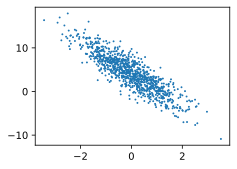

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [7]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [8]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.3311, -0.8926],
        [-0.3308, -0.7157],
        [ 0.1402,  0.3446],
        [-0.2093,  0.0808],
        [ 0.2978,  0.6112],
        [-0.2959, -0.2696],
        [-0.1447,  0.5178],
        [ 0.7811, -0.6074],
        [-0.2749,  0.8901],
        [ 1.8752, -0.6380]]) 
 tensor([[ 9.8821],
        [ 5.9830],
        [ 3.3231],
        [ 3.4905],
        [ 2.6962],
        [ 4.5241],
        [ 2.1562],
        [ 7.8223],
        [ 0.6093],
        [10.1317]])


In [9]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [10]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [11]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [14]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [15]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [16]:
for epoch in range(num_epochs): # 训练模型一共需要num_epochs个迭代周期
    for X, y in data_iter(batch_size, features, labels): # X和y是小批量样本的特征和标签
        l = loss(net(X, w, b), y)   # l是有关小批量X和y的损失
        l.sum().backward() # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size) # 使用小批量随机梯度下降迭代模型参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels) # 计算训练损失
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.027673
epoch 2, loss 0.000104
epoch 3, loss 0.000051


In [17]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 7.2026e-04, -9.2506e-05], grad_fn=<SubBackward0>)
b的估计误差: tensor([-0.0006], grad_fn=<RsubBackward1>)
